# Klimasystem, Glaziologie und Hydrologie (SS16)

## Übungsblatt 3 vom 12. April 2016 

Importiere die nötigen Packete

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Aufgabe 1: Abkühlung durch langwellige Ausstrahlung, Erwärmung durch kurzwellige Einstrahlung

Die Energiebilanz an der Oberfläche setzt sich aus kurzwelliger Einstrahlung $SW_{in}$, langwelliger Abstrahlung $LW_{out}$ sowie atmosphärischer Gegenstrahlung $LW_{in}$, fühlberer $Q_S$ und latenter Wärmestrom $Q_L$, Wärmestrom durch Regen $Q_R$ und Bodenwärmestrom $Q_G$

$ Q_M = (1-\alpha) \cdot SW_{in} + LW_{in} + LW_{out} + Q_S + Q_L + Q_R + Q_G$

Der Wärmeinhalt $C$ ist 

$C = - \int_0^Z \rho(z) c_p T(z) \mathrm{d}z$

wobei Dichte $\rho(z)$ und Temperatur $T(z)$ von der Tiefe $z$ abhängt, $c_p$ die spezifische Wärmekapazität in J/(kgK).

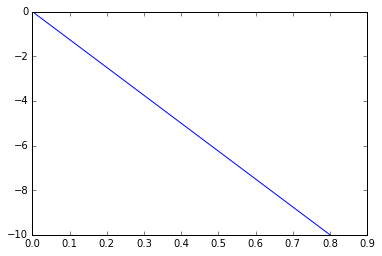

In [11]:
x = np.linspace(0, 0.8, 100)
x = np.arange(0,0.8, 0.008)
y = -10/0.8*x
plt.plot(x,y)

Definiere die gegebenen Konstanten und Formeln

In [12]:
# Define costants
rho_snow = 400 # density snow in kg/m3
c_p_ice = 2009 # specific heat capacity
alpha_snow = 0.6 # albedo
time_night = 14 # time from sunset 18:00 to sunrise 8:00


#### (a) Vergleiche die schematischen Temperaturprofile in einer Schneedecke am Beginn und am Ende einer wolkenlosen Nacht (Abb. 1). Berechne den mittleren langwelligen Nettostrahlungsfluss, der diese Veränderung bewirkt, wenn die Windgeschwindigkeit 0 ist und die turbulenten Wärmeflüsse vernachlässigt werden können.

Aus der Abb. 1 ergibt sich ein Temperaturprofil von
$T(z) = -\frac{1}{0.08} \cdot z$, die Dichte wir als konstant angenommen $\rho(z) = \bar{\rho}$. Daraus erhält man folgendes Integral

$
    C = - \overline{\rho}c_p \int_0^Z -\frac{z}{0.08} ~ \mathrm{d}z \\
    C = \frac{\overline{\rho} \cdot c_p}{0.08} ~ \left. z^2 ~ \right|_0^{Z} \\
$

In [28]:
def calc_heat_energy_depth(rho, c_p, grad, z1, z2):
    C = -rho * c_p * grad * (z2**2 - z1**2)/2
    return C

z1 = 0
z2 = 0.8

heat_lw_sunrise = calc_heat_energy_depth(rho_snow, c_p_ice, -10/0.8, z1, z2)
heat_lw_sunset = calc_heat_energy_depth(rho_snow, c_p_ice, 273.15, z1, z2)
print('Heat energy sunset: {} MJ'.format(round(heat_lw_sunset/1e6, 2)))
print('Heat energy sunrise: {} MJ'.format(round(heat_lw_sunrise/1e6, 2)))
C = heat_lw_sunrise
print('Heat energy from {} to {} m: {}'.format(z1, z2, round(heat_lw_sunrise/(14*60**2), 2)))


Heat energy sunset: -70.24 MJ
Heat energy sunrise: 3.21 MJ
Heat energy from 0 to 0.8 m: 63.78


Das ergibt einen Wärmeinhalt

$
C = \overline{\rho} \cdot c_p ~ \frac{0.8^2}{2}\\
C = 8 \cdot \overline{\rho} \cdot c_p\\
$

von $C = 6.43$ MJ verteilt über 14 Stunden vom Sonnenuntergang bis -aufgang,

$
E = \frac{C}{t} = \frac{6.43 \mathrm{MJ}}{14 \mathrm{h} \cdot 3600 \mathrm{sec/h}}
$

In [29]:
E = C/(time_night*3600)
print('Longwave net-radiation during the night: {} W/m^2'.format(round(E, 2)))

Longwave net-radiation during the night: 63.78 W/m^2


#### (b) In der beigefügten Tabelle finden sich stündliche Werte der solaren Einstrahlung (alle Werte in W/m$^2$) für einen Tag ohne Nierderschlag ($Q_R = 0$). Wann erreicht die Temperatur der Schneedecke nach Sonnenaufgang wieder 0° C, wenn turbulente Flüsse und langwellige Nettostrahlung vernachlässigt werden?!

Die kurzwellige Strahlungsbilanz $Q_k = G - R$ ergibt sich aus der Differenz zwischen einkommender Globalstrahlung $G$ und der gesamten (planetare sowie atmosphärischen) Relexstrahlung $R$. Diese lässt sich über die Albedo $\alpha$ berechnen $R = \alpha \cdot G$, sodass $Q_k = G\cdot(1-\alpha)$.

In [31]:
# Define hourly incoming short wave radiation during day
time_sunrise = 8
time_sunset = 18
time = np.arange(time_sunrise+1,time_sunset+1,1)

alpha_offset = 0.1

sw_in = np.array([50,300,500,800,750,650,450,300,100,50])
sw_in_alb = (1-alpha_snow)*sw_in
sw_in_alb_higher = (1-(alpha_snow+alpha_offset))*sw_in


In [32]:
n = sw_in.size
sw_in_cum = np.zeros(n)
sw_in_cum_alb = np.zeros(n)
sw_in_cum_alb_higher = np.zeros(n)
sw_in_cum[0] = sw_in[0]
sw_in_cum_alb[0] = sw_in_alb[0]
sw_in_cum_alb_higher[0] = sw_in_alb_higher[0]

for i in range(1,n):
    sw_in_cum[i] = sw_in[i] + sw_in_cum[i-1]
    sw_in_cum_alb[i] = sw_in_alb[i] + sw_in_cum_alb[i-1]
    sw_in_cum_alb_higher[i] = sw_in_alb_higher[i] + sw_in_cum_alb_higher[i-1]

heat_energy = sw_in * 3600
heat_energy_cum = sw_in_cum * 3600

heat_energy_alb = sw_in_alb * 3600
heat_energy_cum_alb = sw_in_cum_alb * 3600

heat_energy_alb_higher = sw_in_alb_higher * 3600
heat_energy_cum_alb_higher = sw_in_cum_alb_higher * 3600

In [33]:
mean = sw_in.mean()
print(mean)

395.0


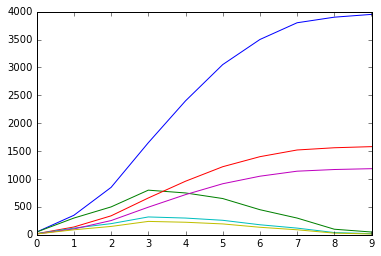

In [34]:
plt.plot(sw_in_cum)
plt.plot(sw_in)

plt.plot(sw_in_cum_alb)
plt.plot(sw_in_alb)

plt.plot(sw_in_cum_alb_higher)
plt.plot(sw_in_alb_higher)

[ 9 10 11 12 13 14 15 16 17 18]


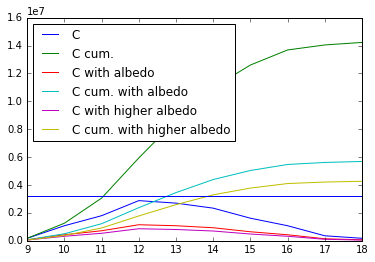

In [35]:
hours = np.arange(9,19)
print(hours)

plt.plot(hours, heat_energy, label='C')
plt.plot(hours, heat_energy_cum, label='C cum.')
plt.plot(hours, heat_energy_alb, label='C with albedo')
plt.plot(hours, heat_energy_cum_alb, label='C cum. with albedo')
plt.plot(hours, heat_energy_alb_higher, label='C with higher albedo')
plt.plot(hours, heat_energy_cum_alb_higher, label='C cum. with higher albedo')

plt.axhline(3214400)
plt.legend(loc='best')

### Aufgabe 2: Energiebilanz Eisoberfläche und Schmelze/Verdunstung

#### (a) Berechne die mittlere Energiebilanz anhand der gegebenen bzw. zu berechnenden Tagesmittelwerte der Energieflüsse.

In [62]:
# Define give constants
sigma  =5.67e-8
T_ice = 273.15

sw_in = 200
alpha_ice = 0.3
lw_in = 280
lw_out = -T_ice**4*5.67e-8
print(lw_out)
q_s = 25
q_l = -20
q_g = -3

q_m = sw_in * (1-alpha_ice) + lw_in + lw_out + q_s + q_l + q_g
print(q_m)

-315.63697918226694
106.36302081773306


In [58]:
q_m*24*60**2/0.334e6

27.514266463030346

In [59]:
-q_l*24*60**2/2.883e6

0.5993756503642039

In [72]:
q_g = 0

q_m_temp = sw_in * (1-alpha_ice) + lw_in + lw_out + q_s + q_l + q_g
print(q_m_temp)

109.36302081773306


In [78]:
-q_m_temp*24*60**2*365/0.334e6

-10325.964744036017

In [75]:
q_g = 0.15

q_m_temp_2 = sw_in * (1-alpha_ice) + lw_in + lw_out + q_s + q_l + q_g
print(q_m_temp)

109.36302081773306


In [76]:
-(q_m_temp-q_m_temp_2)*24*60**2*365/0.334e6

14.162874251497541

In [79]:
n

10

(0, 100)

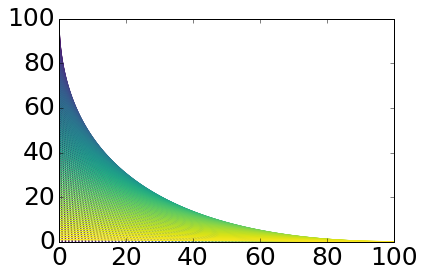

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

n = 100
x = np.linspace(0, n)
def f(k,d):
    return k*x+d

col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)
    
for i in range(1,n):
    col = scalarMap.to_rgba(i)
    k = -(n-i)/i
    d = n-i
    y = f(k,d)
    plt.plot(x, y, color=col)
    
plt.xlim(0,n)
plt.ylim(0,n)

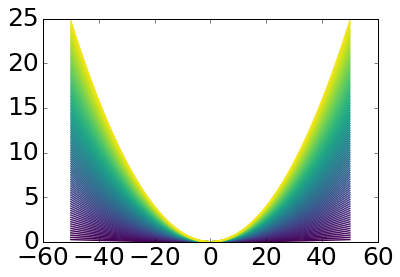

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w = 100
col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)


bed_shape = np.arange(0.0001, 0.01, 0.0001)
n_bs = bed_shape.size
h = np.zeros(n_bs)
x = np.linspace(-w/2, w/2, 100)
for i, bs in enumerate(bed_shape):
    col = scalarMap.to_rgba(i)
    y = bs * (x)**2
    h[i] = bs * (w/2)**2
    plt.plot(x,y, color=col)

In [4]:
h

array([  0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,   2.  ,
         2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,   4.  ,
         4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,   6.  ,
         6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,   8.  ,
         8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ,
        10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,  12.  ,
        12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,  14.  ,
        14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,  16.  ,
        16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,  18.  ,
        18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,  20.  ,
        20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,  22.  ,
        22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,  24.  ,
        24.25,  24.5 ,  24.75])

## Compare bed shapes

In [2]:
import matplotlib
# modify plot properties
matplotlib.rc('lines', linewidth=1.5)

matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=35)

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

matplotlib.rc('legend', fontsize=25)
matplotlib.rc('legend', frameon=False)

In [3]:
w = 425
h = np.array([145, 150])
bed_shape = 4 * h / w**2

In [4]:
bed_shape_model = np.array([0.00272345,  0.004,  0.00307193])
widths = np.array([w, w, 471.91089533,  378.24052903,  363.18062444])
bed_shape = np.append(bed_shape, bed_shape_model)
# heights container
h = bed_shape*0

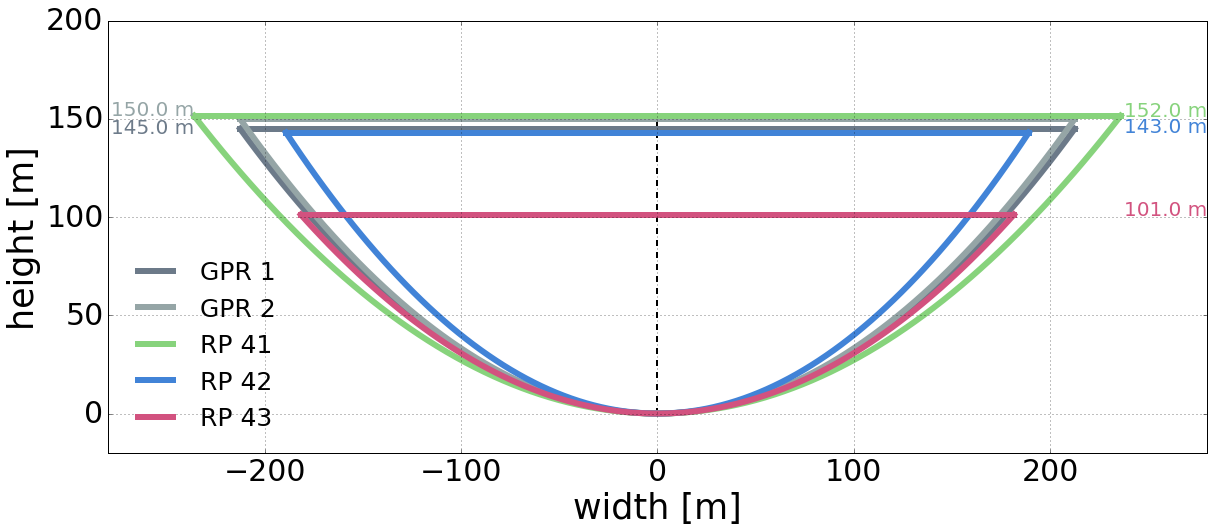

In [8]:
# create figure
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0.1, 0.1, 1, 1])

# costum labels and colors
labels = ['GPR 1', 'GPR 2', 'RP 41', 'RP 42', 'RP 43']
colors = ['#6C7A89', '#95A5A6', '#87D37C', '#4183D7', '#D2527F']
# container
parabolas = list()

ax.plot([0,0], [0,h[2]], color='k', lw=2, linestyle='--')

for i, bs in enumerate(bed_shape):
    w = widths[i]
    # x values
    x = np.linspace(-w/2, w/2, 100)
    x0 = x[0]
    x1 = x[-1]

    
    y = bs * (x)**2
    h[i] = bs * (w/2)**2
    p = ax.plot(x,y, label=labels[i], color=colors[i], lw=6)
    ax.plot([x0,x1], [h[i],h[i]], color=colors[i], lw=6)
    # plot heigth as text
    text = '{} m'.format(round(h[i],0))
    xt = 233
    yt = h[i]
    if i in [0, 1]:
        xt = -(xt + 40)
        yt += (-1)**(i+1)*2
    ax.text(xt*1.02, yt, text, fontsize=20, color=colors[i])
    # get different legends
    parabolas.append(p)


ax.set_ylim([-20,200])
xlim = 280
ax.set_xlim([-xlim,xlim])
ax.set_aspect('equal')

ax.grid()
ax.legend(loc=0)
ax.set_xlabel('width [m]')
ax.set_ylabel('height [m]')

In [42]:
w = 425
h = np.array([145, 150])
bed_shape = 4 * h / w**2

In [43]:
bed_shape_model = np.array([0.00272345,  0.004,  0.00307193])
bed_shape = np.append(bed_shape, bed_shape_model)
# heights container
h = bed_shape*0
bed_shape

array([ 0.00321107,  0.0033218 ,  0.00272345,  0.004     ,  0.00307193])

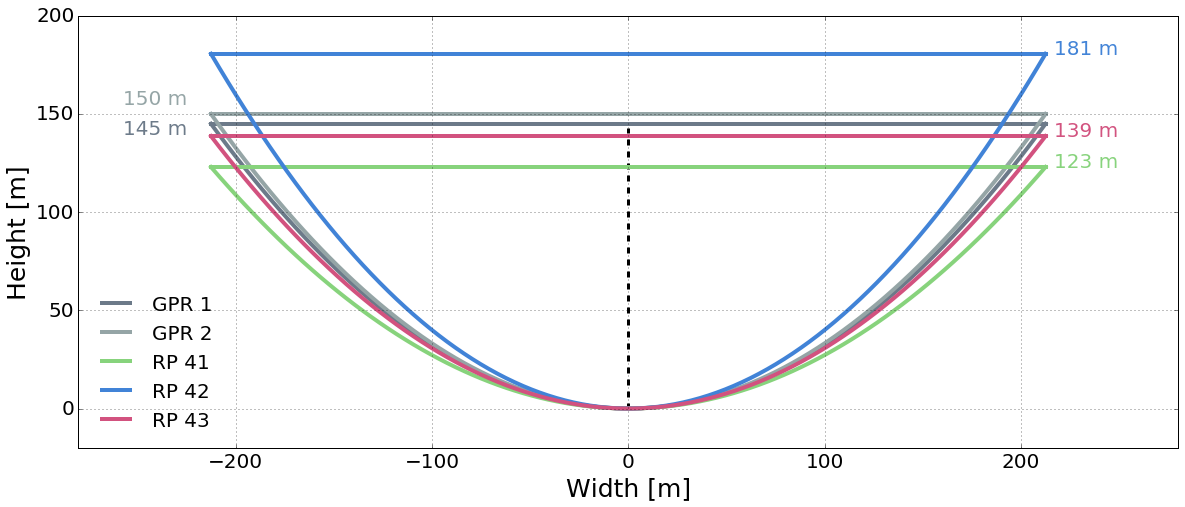

In [47]:
# create figure
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0.1, 0.1, 1, 1])
# costum labels and colors
labels = ['GPR 1', 'GPR 2', 'RP 41', 'RP 42', 'RP 43']
colors = ['#6C7A89', '#95A5A6', '#87D37C', '#4183D7', '#D2527F']
# container
parabolas = list()

w=425

# x values
x = np.linspace(-w/2, w/2, 100)
x0 = x[0]
x1 = x[-1]

ax.plot([0,0], [0,h[3]], color='k', lw=3, linestyle='--')
ax.grid()

for i, bs in enumerate(bed_shape):
    y = bs * (x)**2
    h[i] = bs * (w/2)**2
    p = ax.plot(x,y, label=labels[i], lw=4, color=colors[i])
    ax.plot([x0,x1], [h[i],h[i]], color=colors[i], lw=4)
    # plot heigth as text
    text = '{:.0f} m'.format(round(h[i],0))
    xt = x1
    yt = h[i]
    if i in [0, 1]:
        xt = x0 - 40
        yt += (-1)**(i+1)*5
    ax.text(xt*1.02, yt, text, fontsize=20, color=colors[i])
    # get different legends
    parabolas.append(p)



ax.set_ylim([-20,200])
xlim = 280
ax.set_xlim([-xlim,xlim])
ax.set_aspect('equal')

ax.legend(loc=3)
ax.set_xlabel('Width [m]')
ax.set_ylabel('Height [m]')

## Tounge width

In [255]:
w = 425
bed_shape = np.arange(1e-4, 8e-4, 1e-4)
bed_shape = np.append(np.repeat(1e-4, 5), bed_shape)

In [261]:
bed_shape = np.array([7, 6, 5, 4, 3, 2, 1, 1, 1])*1e-4

In [256]:
# heights container
h = bed_shape*0

In [257]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

0.0007
0.0006
0.0005
0.0004
0.0003
0.0002
0.0001
0.0001
0.0001


/Applications/Miniconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


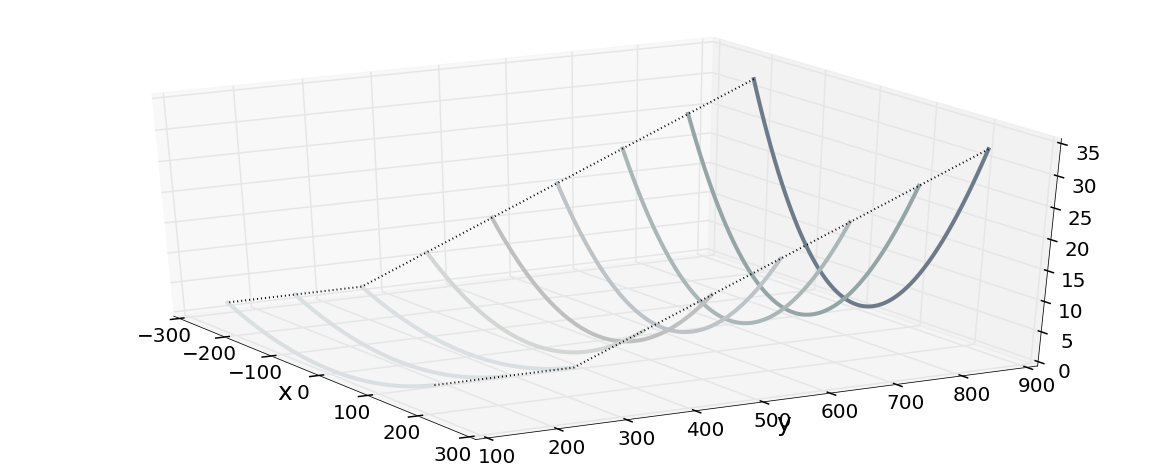

In [290]:
# create figure
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0,0,4, 0.4*4], projection='3d')
# costum labels and colors
colors = ['#6C7A89', '#95A5A6', '#ABB7B7', '#BDC3C7', '#BFBFBF', 
          '#D2D7D3', '#DADFE1', '#DADFE1', '#DADFE1']

# y position presets
n_para = bed_shape.size
d_para = 100
pos0 = n_para * d_para
pos_para = np.arange(100, pos0+1, d_para)
pos_para = pos_para[::-1]

# x values
x = np.linspace(-w/2, w/2, 100)
x0 = x[0]
x1 = x[-1]

# container
parabolas = list()
height = bed_shape * 0

for i, bs in enumerate(bed_shape):
    print(bs)
    z = bs * (x)**2
    y = z*0 + pos_para[i]

    height[i] = bs * x0**2
    
    p = ax.plot(x,y,z, lw=4, color=colors[i])

ax.plot(np.repeat(w/2, n_para), pos_para, height, color='k', linestyle=':', lw=2)
ax.plot(np.repeat(-w/2, n_para), pos_para, height, color='k', linestyle=':', lw=2)
ax.legend(loc=0)
ax.azim = -30
ax.set_xlabel('x')
ax.set_ylabel('y')

In [287]:
.size

9

In [274]:
pos_para

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# modify plot properties
matplotlib.rc('lines', linewidth=1.5)

matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=30)

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

matplotlib.rc('legend', fontsize=30)
matplotlib.rc('legend', frameon=False)

In [12]:
import my_colors as mc

In [13]:
# mean properties
widths = np.array([230, 255, 311])
thickness = np.array([68, 70, 73])

# define U-shaped flowline
w_ = 230

# define trapeziodal flowline
w_0 = 200
alpha = 45
alpha = np.deg2rad(alpha)

# define trapezoidal flowline
bed_shape = 0.003

# costum labels and colors
labels = ['U-shaped', 'trapezoidal', 'parabolic']
colors = [mc.vert_fl_1, mc.trap_fl_1, mc.para_fl_1]

lws = [8,9,10]

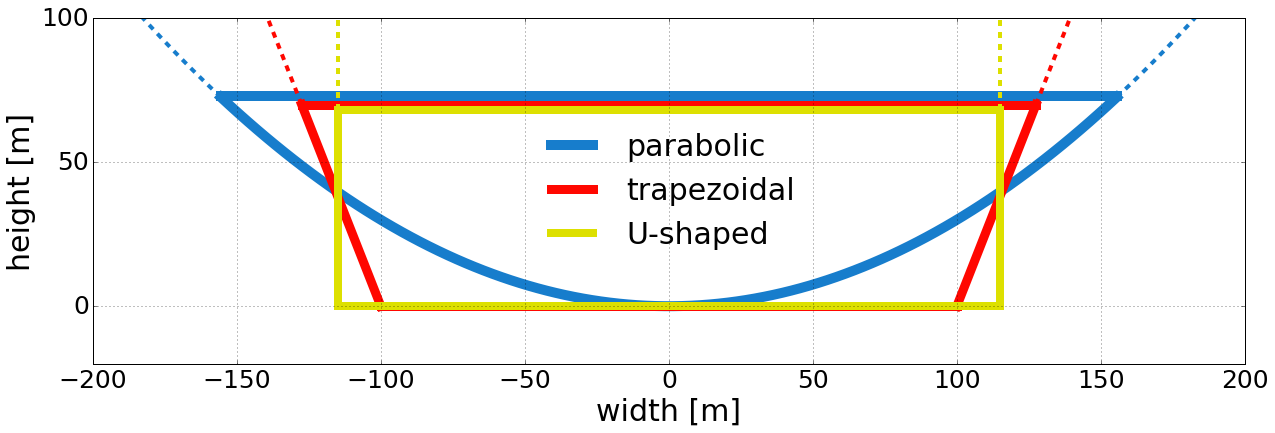

In [14]:
# create figure
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0.1, 0.1, 1*4, 0.348*4])
# container
parabolas = list()

###########################
# PLOT PARABOLIC FLOWLINE #
###########################

i = 2

w = widths[i]
h = thickness[i]
lw = lws[i]
col = colors[i]
lab = labels[i]

# x values
x0 = -w/2
x1 = w/2
x = np.linspace(x0, x1, 100)

y = bed_shape * (x)**2
h_ = bed_shape * (w/2)**2
p = ax.plot(x,y, label=lab, lw=lw, color=col)
ax.plot([x0,x1], [h,h], color=col, lw=lw)

x = np.linspace(x1, x1+30, 50)
y = bed_shape * (x)**2
for i in [-1,1]:
    p = ax.plot(i*x,y, lw=4, color=col, linestyle='--')
    
##################################
# PLOT REAL TRAPEZOIDAL FLOWLINE #
##################################

i = 1

w = widths[i]/2
h = thickness[i]
lw = lws[i]
col = colors[i]
lab = labels[i]
w0 = w_0/2

for i in [-1, 1]:
    ax.plot([i*w0,i*w], [0,h], lw=lw, color=col)
ax.plot([-w0,w0], [0,0], label=lab, lw=lw, color=col)
ax.plot([-w,w], [h,h], color=col, lw=lw)

for i in [-1,1]:
    p = ax.plot([i*w, i*(2*w-w0)], [h, 2*h], lw=4, color=col, linestyle='--')

##########################
# PLOT U-SHAPED FLOWLINE #
##########################
i = 0

w = widths[i]
h = thickness[i]
lw = lws[i]
col = colors[i]
lab = labels[i]

# x values
x0 = -w/2
x1 = w/2

for i in [x0,x1]:
    ax.plot([i,i], [0,h], lw=lw, color=col)
    ax.plot([i,i], [h,2*h], lw=4, color=col, linestyle='--')
ax.plot([x0,x1], [0,0], label=lab, lw=lw, color=col)
ax.plot([x0,x1], [h,h], color=col, lw=lw)


ax.set_yticks(np.arange(-50, 101, 50))

xlim = 200
ax.set_xlim([-xlim,xlim])
ax.set_ylim([-20,100])


ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.legend(loc=0)
ax.set_xlabel('width [m]')
ax.set_ylabel('height [m]')

array([-50,   0,  50, 100])